In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import cm
import xarray as xr
import datetime
import typhon as ty
import arrow
import src

# use typhon ploting style
plt.style.use(ty.plots.styles.get('typhon'))

/net/secaire/mringel/.conda/envs/ac3env/lib/python3.10/site-packages/typhon/nonlte/rtc/__init__.py:9: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def FOSC(tau, Sb, Sm, Ib):


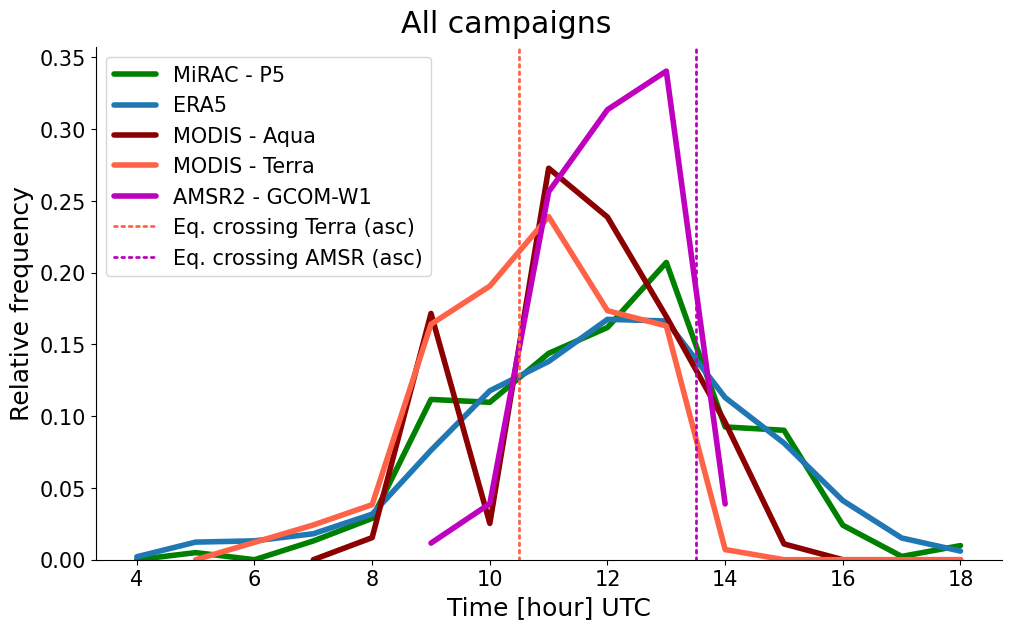

In [2]:
p5 = xr.open_dataset('/net/secaire/mringel/data/lwp_retrieved/all_campaigns_P5_lwp_v3.nc')
era5 = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/all_campaigns_ERA5_lwp.nc')
aqua = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/all_campaigns_P5_MODIS_aqua_lwp.nc')
terra = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/all_campaigns_P5_MODIS_terra_lwp.nc')
amsr = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_amsr2/all_campaigns_P5_AMSR_lwp_v3.nc')

terra = terra.where(terra.lwp!=-9999.)
aqua = aqua.where(aqua.lwp!=-9999.)
amsr = amsr.where(amsr.lwp!=-9999.)

p5_hours = p5.groupby('time.hour').count()
era5_hours = era5.groupby('time.hour').count()
aqua_hours = aqua.groupby('time.hour').count()
terra_hours = terra.groupby('time.hour').count()
amsr_hours = amsr.groupby('time.hour').count()


fig, ax = plt.subplots()

colors = ['green','C0','darkred','tomato','m']
labels = ['MiRAC - P5','ERA5','MODIS - Aqua', 'MODIS - Terra','AMSR2 - GCOM-W1']

linewidth = 4

fig.suptitle('All campaigns')

ax.plot(p5_hours.hour,(p5_hours/p5_hours.lwp.sum()).lwp,linewidth=linewidth,color=colors[0],label=labels[0])
ax.plot(era5_hours.hour,(era5_hours/era5_hours.lwp.sum()).lwp,linewidth=linewidth,color=colors[1],label=labels[1])
ax.plot(aqua_hours.hour,(aqua_hours/aqua_hours.lwp.sum()).lwp,linewidth=linewidth,color=colors[2],label=labels[2])
ax.plot(terra_hours.hour,(terra_hours/terra_hours.lwp.sum()).lwp,linewidth=linewidth,color=colors[3],label=labels[3])
ax.plot(amsr_hours.hour,(amsr_hours/amsr_hours.lwp.sum()).lwp,linewidth=linewidth,color=colors[4],label=labels[4])

ax.axvline(x=10.5,c='tomato',linestyle='dotted',label='Eq. crossing Terra (asc)')
ax.axvline(x=13.5,c='m',linestyle='dotted',label='Eq. crossing AMSR (asc)')
#ax.axvline(x=1.5,c='m',linestyle='dashed',label='Eq. crossing AMSR (desc)')

ax.set_ylim(bottom=0)

ax.set_xlabel('Time [hour] UTC')
ax.set_ylabel('Relative frequency')

ax.legend(loc='upper left')

#plt.savefig('/home/mringel/lwp_project/figures/histograms/satellite_collocation_times.png',
#            bbox_inches='tight',
#            dpi=200)

Text(0.48, -0.04, 'Time [hour] UTC')

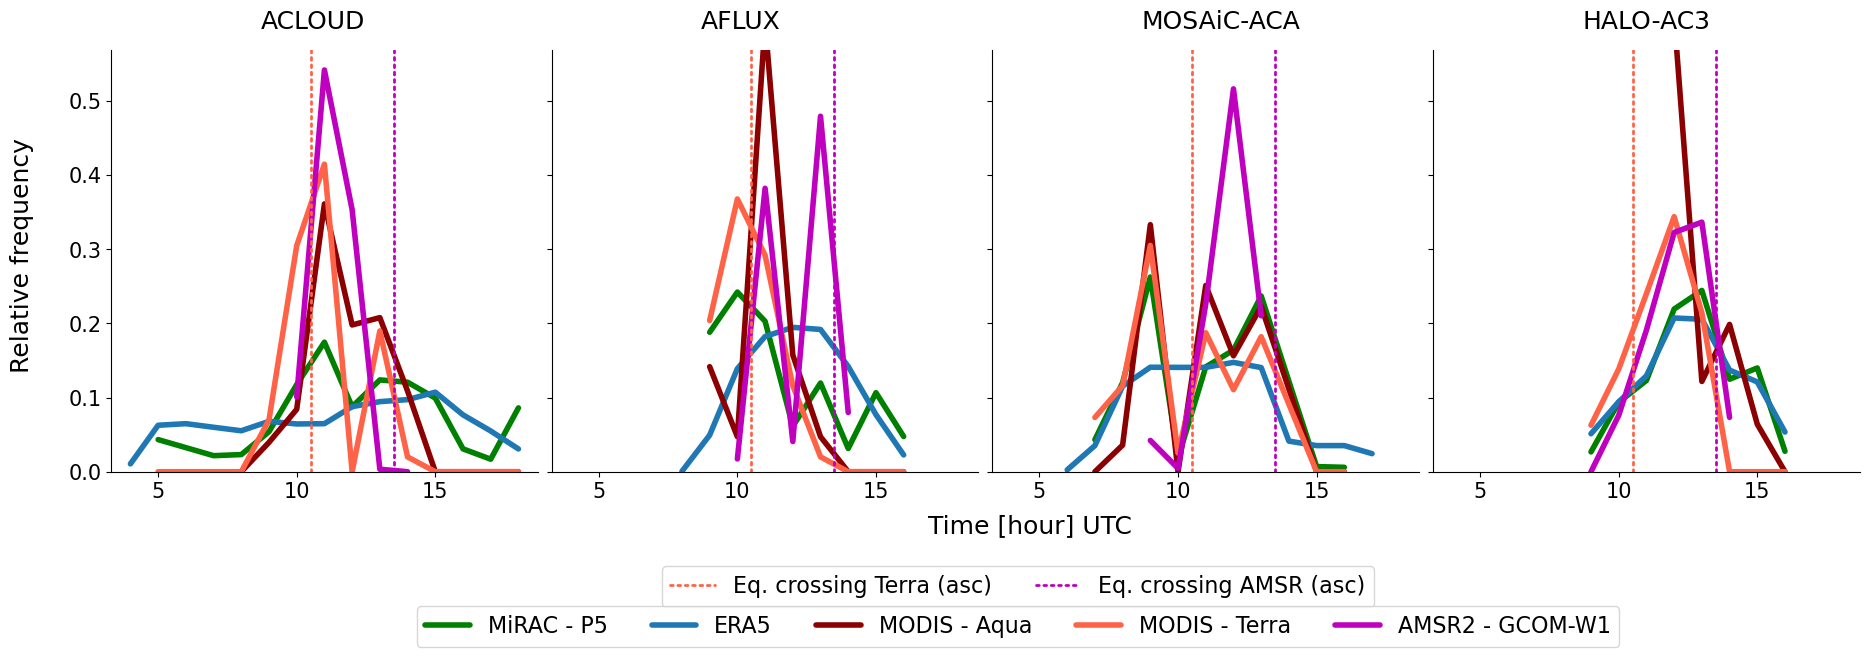

In [3]:
fig, axs = plt.subplots(1,4,figsize=(18,5),sharey=True,sharex=True)

colors = ['green','C0','darkred','tomato','m']
labels = ['MiRAC - P5','ERA5','MODIS - Aqua', 'MODIS - Terra','AMSR2 - GCOM-W1']
campaigns = ['ACLOUD','AFLUX','MOSAiC-ACA','HALO-AC3']

linewidth = 4

for col in range(4):

    axs[col].text(0.35,1.05,campaigns[col],transform=axs[col].transAxes)

    p5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_retrieved/{campaigns[col]}_allRFs_P5_lwp.nc')
    era5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_collocated/{campaigns[col]}_allRFs_P5_ERA5_lwp.nc')
    aqua_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_collocated/lwp_modis/{campaigns[col]}_allRFs_P5_MODIS_aqua_lwp.nc')
    terra_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_collocated/lwp_modis/{campaigns[col]}_allRFs_P5_MODIS_terra_lwp.nc')
    amsr_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_collocated/lwp_amsr2/{campaigns[col]}_allRFs_P5_AMSR_lwp.nc')

    terra_campaign = terra_campaign.where(terra_campaign.lwp!=-9999.)
    aqua_campaign = aqua_campaign.where(aqua_campaign.lwp!=-9999.)
    amsr_campaign = amsr_campaign.where(amsr_campaign.lwp!=-9999.)

    p5_hours = p5_campaign.groupby('time.hour').count()
    era5_hours = era5_campaign.groupby('time.hour').count()
    aqua_hours = aqua_campaign.groupby('time.hour').count()
    terra_hours = terra_campaign.groupby('time.hour').count()
    amsr_hours = amsr_campaign.groupby('time.hour').count()

    axs[col].plot(p5_hours.hour,(p5_hours/p5_hours.lwp.sum()).lwp,linewidth=linewidth,color=colors[0],label=labels[0])
    axs[col].plot(era5_hours.hour,(era5_hours/era5_hours.lwp.sum()).lwp,linewidth=linewidth,color=colors[1],label=labels[1])
    axs[col].plot(aqua_hours.hour,(aqua_hours/aqua_hours.lwp.sum()).lwp,linewidth=linewidth,color=colors[2],label=labels[2])
    axs[col].plot(terra_hours.hour,(terra_hours/terra_hours.lwp.sum()).lwp,linewidth=linewidth,color=colors[3],label=labels[3])
    axs[col].plot(amsr_hours.hour,(amsr_hours/amsr_hours.lwp.sum()).lwp,linewidth=linewidth,color=colors[4],label=labels[4])

    axs[col].axvline(x=10.5,c='tomato',linestyle='dotted',label='Eq. crossing Terra (asc)')
    axs[col].axvline(x=13.5,c='m',linestyle='dotted',label='Eq. crossing AMSR (asc)')

    axs[col].set_ylim(bottom=0)

handles, lgd_labels = axs[col].get_legend_handles_labels()
fig.legend(handles[5:], lgd_labels[5:], prop={'size': 16}, loc='lower center', ncol=5, bbox_to_anchor=(0.53,-0.225))
fig.legend(handles[:5], lgd_labels[:5], prop={'size': 16}, loc='lower center', ncol=5, bbox_to_anchor=(0.53,-0.305))
fig.text(-0.03, 0.5,'Relative frequency',rotation=90,fontsize=18,va='center')
fig.text(0.48, -0.04,'Time [hour] UTC',fontsize=18,va='center')

#plt.savefig('/home/mringel/lwp_project/figures/histograms/satellite_collocation_times_campaigns.png',
#            bbox_inches='tight',
#            dpi=200)

/tmp/ipykernel_1330511/3458886744.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', 4).colors


ACLOUD 14491
AFLUX 14906
MOSAiC-ACA 28345
HALO-AC3 54534


(0.0, 14004.9)

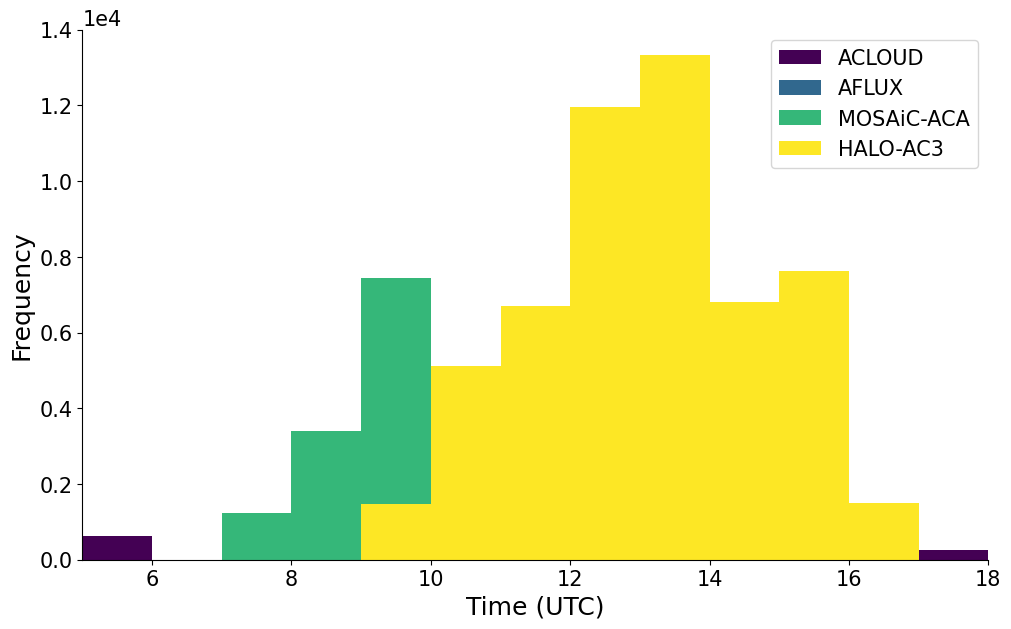

In [3]:
fig, ax = plt.subplots()

colors = cm.get_cmap('viridis', 4).colors  
campaigns = ['ACLOUD','AFLUX','MOSAiC-ACA','HALO-AC3']  

for j in range(4):

    p5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_retrieved/{campaigns[j]}_allRFs_P5_lwp.nc')
    
    datetimes = p5_campaign.time.values
    numtimes = np.array([int(src.to_datetime(datetimes[i]).time().strftime('%H%M%S')) for i in range(len(datetimes))])

    print(campaigns[j]+' '+str(len(numtimes)))
    ax.hist(numtimes/10000,bins=24,range=(0,24),color=colors[j],label=campaigns[j])

ax.legend()
ax.set_xlim(5,18)
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Frequency')

ax.set_ylim(bottom=0)
#ax.set_xlim(0,24)

Text(0.48, -0.05, 'Time [UTC]')

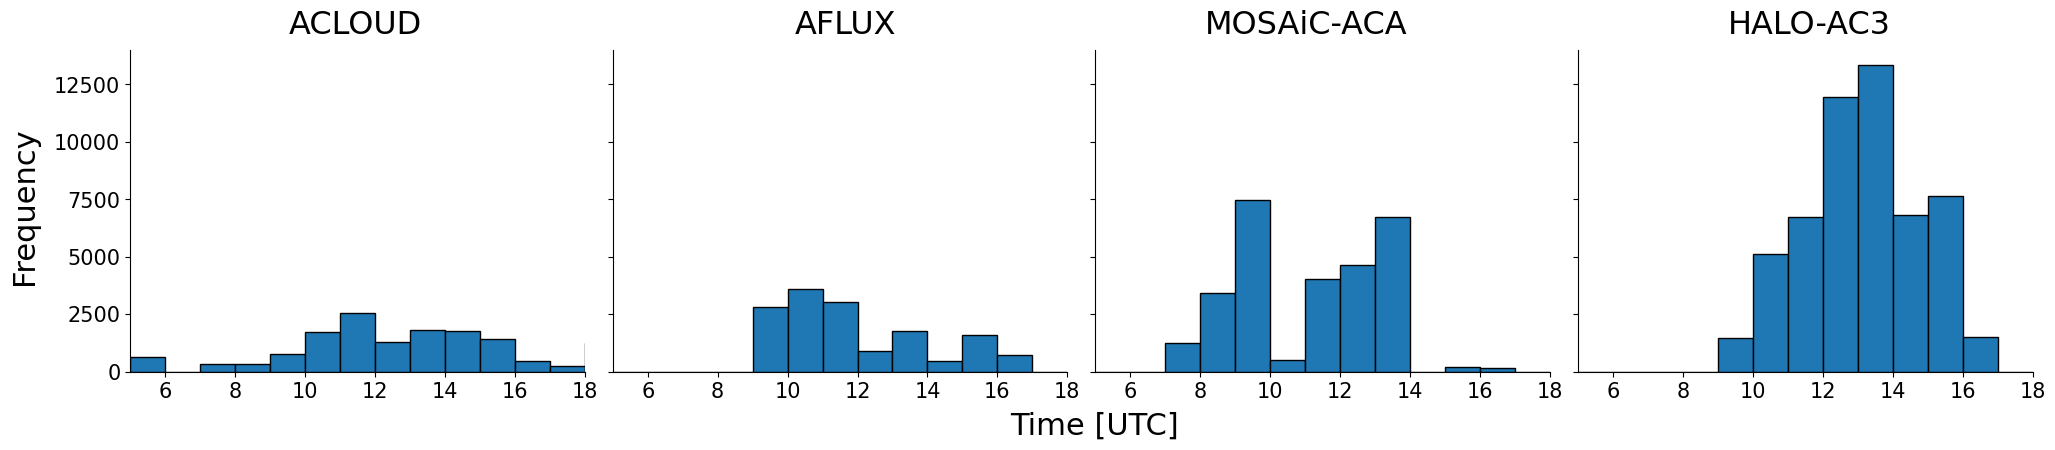

In [4]:
fig, axs = plt.subplots(1,4,figsize=(20,4),sharex=True,sharey=True)


p5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_retrieved/ACLOUD_allRFs_P5_lwp.nc') 
datetimes = p5_campaign.time.values
numtimes = np.array([int(src.to_datetime(datetimes[i]).time().strftime('%H%M%S')) for i in range(len(datetimes))])
axs[0].hist(numtimes/10000,bins=24,range=(0,24),color='C0',ec='black')
axs[0].set_xlim(5,18)
axs[0].ticklabel_format(useOffset=False, style='plain')

p5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_retrieved/AFLUX_allRFs_P5_lwp.nc') 
datetimes = p5_campaign.time.values
numtimes = np.array([int(src.to_datetime(datetimes[i]).time().strftime('%H%M%S')) for i in range(len(datetimes))])
axs[1].hist(numtimes/10000,bins=24,range=(0,24),color='C0',ec='black')
axs[1].set_xlim(5,18)
#axs[0,1].ticklabel_format(useOffset=False, style='plain')

p5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_retrieved/MOSAiC-ACA_allRFs_P5_lwp.nc') 
datetimes = p5_campaign.time.values
numtimes = np.array([int(src.to_datetime(datetimes[i]).time().strftime('%H%M%S')) for i in range(len(datetimes))])
axs[2].hist(numtimes/10000,bins=24,range=(0,24),color='C0',ec='black')
axs[2].set_xlim(5,18)
#axs[1,0].yticklabel_format(useOffset=False, style='plain')

p5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_retrieved/HALO-AC3_allRFs_P5_lwp.nc') 
datetimes = p5_campaign.time.values
numtimes = np.array([int(src.to_datetime(datetimes[i]).time().strftime('%H%M%S')) for i in range(len(datetimes))])
axs[3].hist(numtimes/10000,bins=24,range=(0,24),color='C0',ec='black')
axs[3].set_xlim(5,18)
#axs[1,1].ticklabel_format(useOffset=False, style='plain')

axs[0].text(0.35,1.05,campaigns[0],fontsize=23,transform=axs[0].transAxes)
axs[1].text(0.4,1.05,campaigns[1],fontsize=23,transform=axs[1].transAxes)
axs[2].text(0.24,1.05,campaigns[2],fontsize=23,transform=axs[2].transAxes)
axs[3].text(0.33,1.05,campaigns[3],fontsize=23,transform=axs[3].transAxes)

fig.text(-0.02, 0.5,'Frequency',rotation=90,fontsize=22,va='center')
fig.text(0.48, -0.05,'Time [UTC]',fontsize=22,va='center')

#plt.savefig('/home/mringel/lwp_project/figures/figures4paper/P5_flight_times.png',bbox_inches='tight',dpi=200)


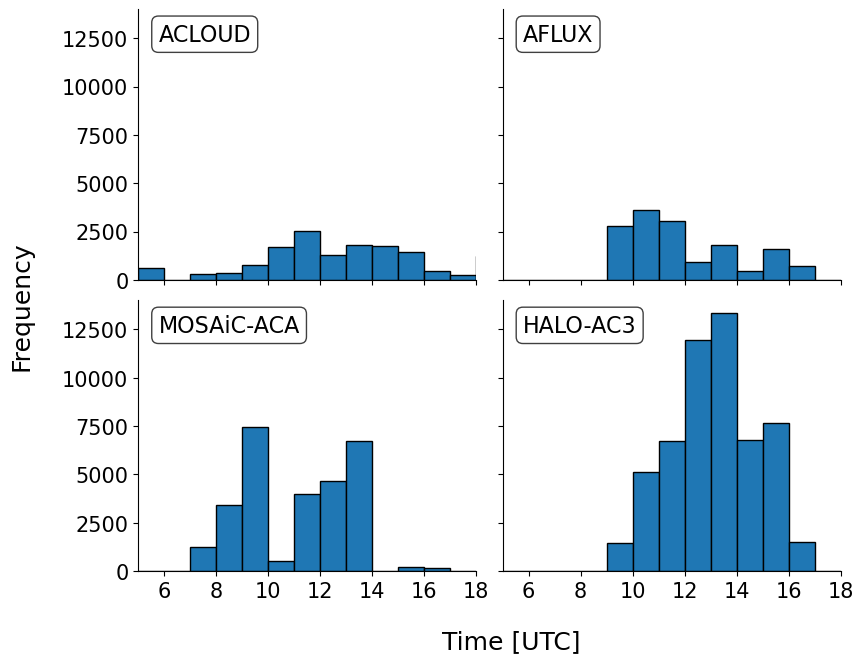

In [30]:
fig, axs = plt.subplots(2,2,figsize=(8,6),sharex=True,sharey=True)

textbox = dict(boxstyle='round', facecolor='white', alpha=0.75)
labelsize = 16

p5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_retrieved/ACLOUD_allRFs_P5_lwp.nc') 
datetimes = p5_campaign.time.values
numtimes = np.array([int(src.to_datetime(datetimes[i]).time().strftime('%H%M%S')) for i in range(len(datetimes))])
axs[0,0].set_xticks([6,8,10,12,14,16,18])
axs[0,0].hist(numtimes/10000,bins=24,range=(0,24),color='C0',ec='black')
axs[0,0].set_xlim(5,18)
axs[0,0].ticklabel_format(useOffset=False, style='plain')

axs[0,0].text(0.06,0.95,campaigns[0],fontsize=labelsize,transform=axs[0,0].transAxes,
              verticalalignment='top', bbox=textbox)

p5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_retrieved/AFLUX_allRFs_P5_lwp.nc') 
datetimes = p5_campaign.time.values
numtimes = np.array([int(src.to_datetime(datetimes[i]).time().strftime('%H%M%S')) for i in range(len(datetimes))])
axs[0,1].hist(numtimes/10000,bins=24,range=(0,24),color='C0',ec='black')
axs[0,1].set_xlim(5,18)

axs[0,1].text(0.06,0.95,campaigns[1],fontsize=labelsize,transform=axs[0,1].transAxes,
              verticalalignment='top', bbox=textbox)

p5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_retrieved/MOSAiC-ACA_allRFs_P5_lwp.nc') 
datetimes = p5_campaign.time.values
numtimes = np.array([int(src.to_datetime(datetimes[i]).time().strftime('%H%M%S')) for i in range(len(datetimes))])
axs[1,0].hist(numtimes/10000,bins=24,range=(0,24),color='C0',ec='black')
axs[1,0].set_xlim(5,18)

axs[1,0].text(0.06,0.95,campaigns[2],fontsize=labelsize,transform=axs[1,0].transAxes,
              verticalalignment='top', bbox=textbox)

p5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_retrieved/HALO-AC3_allRFs_P5_lwp.nc') 
datetimes = p5_campaign.time.values
numtimes = np.array([int(src.to_datetime(datetimes[i]).time().strftime('%H%M%S')) for i in range(len(datetimes))])
axs[1,1].hist(numtimes/10000,bins=24,range=(0,24),color='C0',ec='black')
axs[1,1].set_xlim(5,18)

axs[1,1].text(0.06,0.95,campaigns[3],fontsize=labelsize,transform=axs[1,1].transAxes,
              verticalalignment='top', bbox=textbox)

fig.text(-0.06, 0.5,'Frequency',rotation=90,fontsize=18,va='center')
fig.text(0.48, -0.06,'Time [UTC]',fontsize=18,va='center')

plt.savefig('/home/mringel/lwp_project/figures/figures4paper/P5_flight_times_v2.png',bbox_inches='tight',dpi=200)

/tmp/ipykernel_2568411/912624038.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', 4).colors


(0.0, 13996.45)

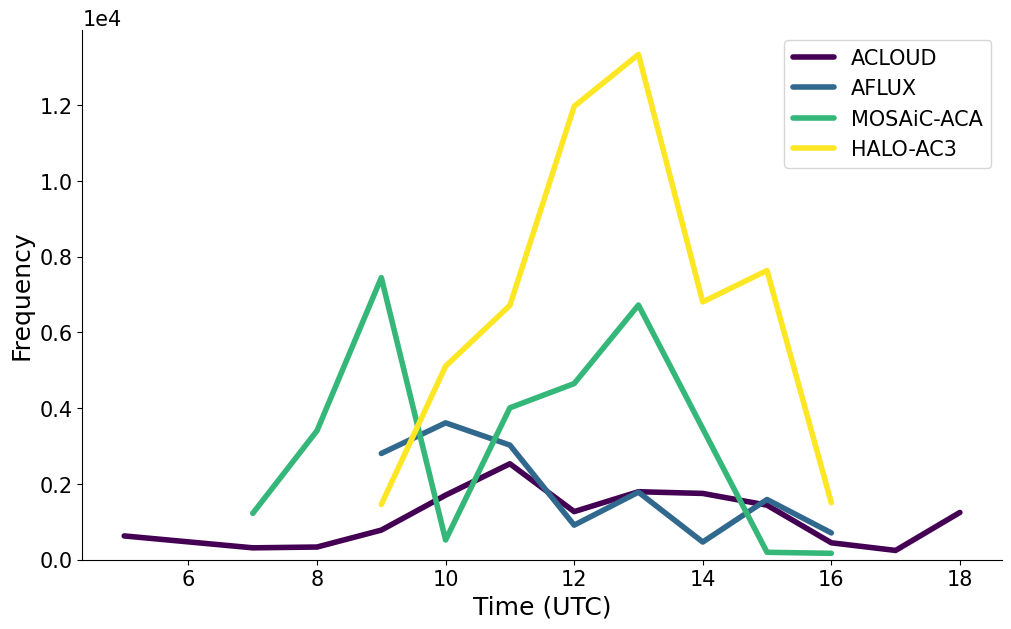

In [53]:
fig, ax = plt.subplots()

colors = cm.get_cmap('viridis', 4).colors    

for j in range(4):

    p5_campaign = xr.open_dataset(f'/net/secaire/mringel/data/lwp_retrieved/{campaigns[j]}_allRFs_P5_lwp.nc')

    p5_hours = p5_campaign.groupby('time.hour').count()

    ax.plot(p5_hours.hour,p5_hours.lwp,linewidth=linewidth,color=colors[j],label=campaigns[j])

ax.legend()

ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Frequency')

ax.set_ylim(bottom=0)
#ax.set_xlim(0,24)